# Matrix Decompositions: ICA, NMF, PCA

In [1]:
# Import packages

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA, FastICA, NMF

plt.rcParams.update({'font.size': 14})

In [2]:
# Import data

X=pd.read_pickle('X.pkl')

## PCA

In [3]:
# Confirm PCA parameters

print('Input matrix shape: ', X.shape)

# Change number of components as necessary

model_pca=PCA(n_components=3, 
              copy=True, 
              whiten=False, 
              svd_solver='auto', 
              tol=0.0, 
              iterated_power='auto', 
              random_state=None)

Input matrix shape:  (333900, 60)


In [4]:
# Fit PCA in the Spatial Domain

model_pca.fit(X.T)

print('Explained variance : ',model_pca.explained_variance_)
print('Explained variance ratio: ',model_pca.explained_variance_ratio_)
print('Singular values: ', model_pca.singular_values_)

X_pca=model_pca.transform(X.T)

Explained variance :  [134438.2879445   75034.7386567   51495.53517924]
Explained variance ratio:  [0.3068372  0.17125664 0.11753159]
Singular values:  [2816.35562185 2104.055508   1743.05380742]


In [5]:
#  Fit PCA in the Temporal Domain

X_temp=X.values.reshape(477,700,60).transpose(1,0,2).reshape(700, 477*60) #time

model_pca.fit(X_temp)

print('Explained variance : ',model_pca.explained_variance_)
print('Explained variance ratio: ',model_pca.explained_variance_ratio_)
print('Singular values: ', model_pca.singular_values_)

X_temp_pca=model_pca.transform(X_temp)

Explained variance :  [6418.19701651 3014.83257885 2015.93337139]
Explained variance ratio:  [0.17871866 0.08394987 0.05613491]
Singular values:  [2118.09341497 1451.67764074 1187.07094422]


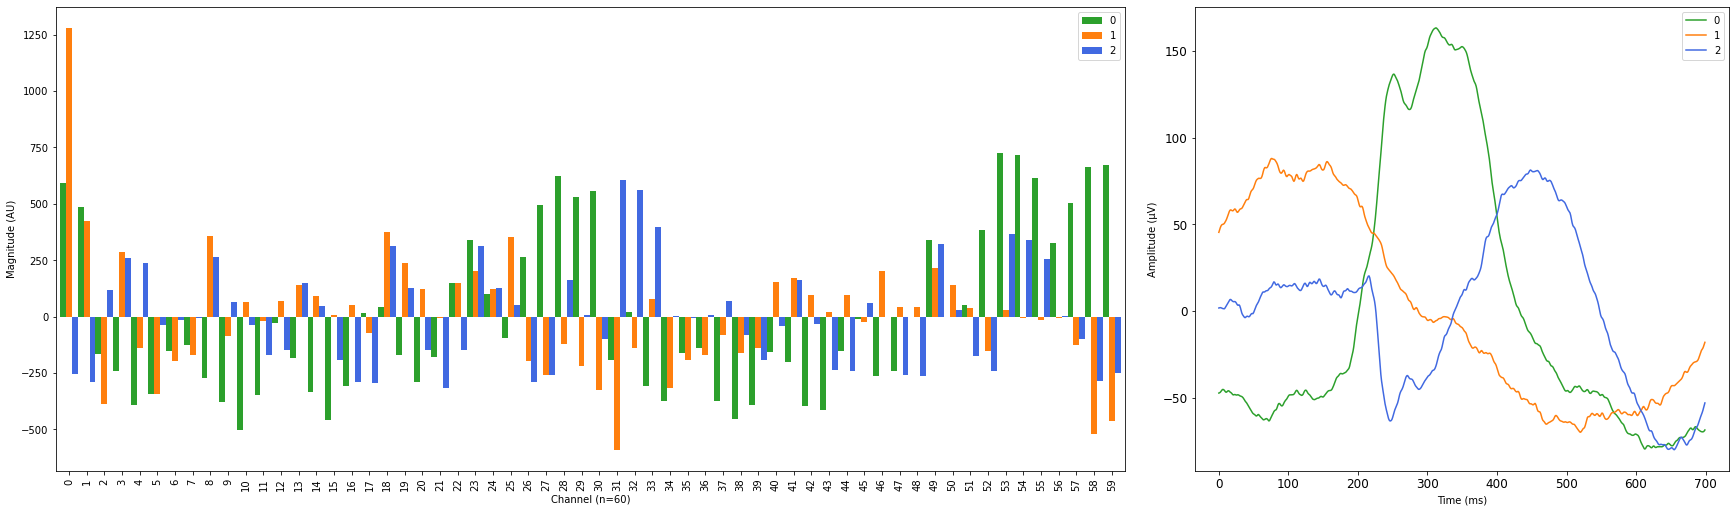

In [6]:
# Visualise the PCA components across channels & time

%matplotlib inline

pd1 = pd.DataFrame(X_pca)
pd2 = pd.DataFrame(X_temp_pca)

fig, ax = plt.subplots(1, 2, figsize=(24,7), gridspec_kw={'width_ratios': [2, 1]}, constrained_layout=True)

pd1.plot(ax=ax[0], 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='Magnitude (AU)', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax[0].set_xticklabels(X.columns)

pd2.plot(ax=ax[1],
         kind='line',  
         xlabel='Time (ms)', 
         ylabel='Amplitude (μV)', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

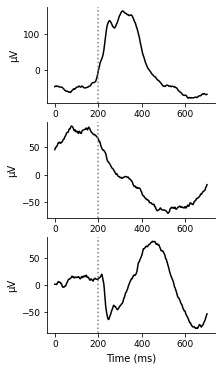

In [7]:
# Plot components individually

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

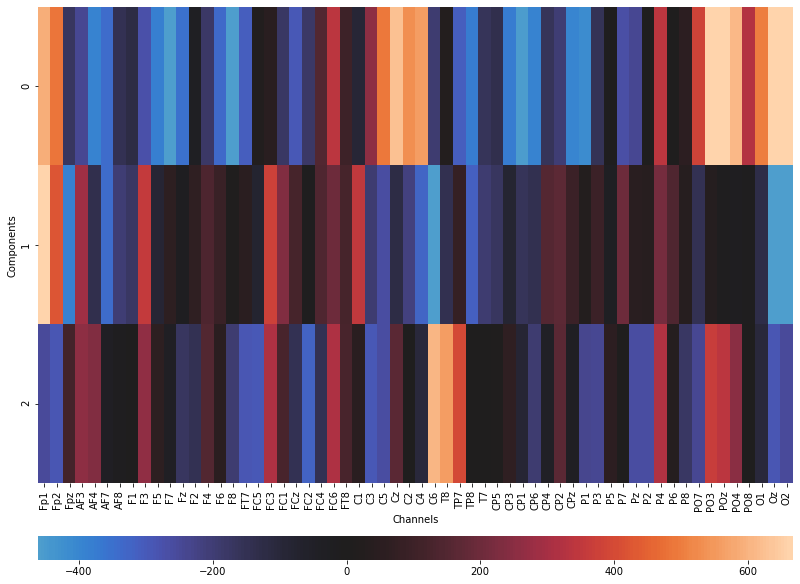

In [8]:
# Plot components as a heatmap across all channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## ICA

In [9]:
# ICA parameters

model_ica = FastICA(n_components=3, 
                    algorithm='parallel', 
                    whiten=True, 
                    fun='logcosh', 
                    fun_args=None, 
                    max_iter=1000, 
                    tol=0.0001, 
                    w_init=None, 
                    random_state=None)

In [10]:
# Fit the ICA in the spatial domain 

model_ica.fit(X.T)

print('Components: ',model_ica.components_)
print('Mixing values: ', model_ica.mixing_)
print('Mean values: ', model_ica.mean_)

X_ica=model_ica.transform(X.T);

Components:  [[-5.16257753e-07 -4.85712039e-07 -2.84272771e-07 ... -1.71429621e-07
  -3.27032282e-07 -4.73594037e-07]
 [-1.66241896e-06 -1.70696944e-06 -1.40995610e-06 ... -3.93302744e-07
  -3.59608172e-07 -3.68513670e-07]
 [ 1.29088634e-07  1.65355142e-07  1.31053708e-07 ...  4.50934991e-07
   4.93242719e-07  5.37971058e-07]]
Mixing values:  [[-3.18265049 -5.85773904  0.31299327]
 [-3.03594734 -5.9850057   0.61717209]
 [-1.99256968 -4.87246842  0.58991442]
 ...
 [-0.53330553 -1.3834007   3.21864391]
 [-1.16168136 -1.36284134  3.38032575]
 [-1.77332762 -1.47882527  3.56655121]]
Mean values:  [-1.20524101 -1.25162773 -1.16699231 ... -0.38248702 -0.44026697
 -0.46468104]


In [11]:
# Fit the ICA in the temporal domain 

X_temp=X.values.reshape(477,700,60).transpose(1,0,2).reshape(700,477*60) #time

model_ica.fit(X_temp)

print('Components: ',model_ica.components_)
print('Mixing values: ', model_ica.mixing_)
print('Mean values: ', model_ica.mean_)

X_temp_ica=model_ica.transform(X_temp)

Components:  [[-2.06288198e-06  3.72736412e-06  7.56786697e-06 ...  2.17304178e-06
   3.39686653e-06  2.59566901e-06]
 [ 9.42776599e-06  1.26922789e-05 -3.45691087e-06 ...  1.75185584e-06
   4.01412044e-06  3.84039555e-06]
 [ 8.88160828e-06  5.17480083e-06 -6.59454946e-06 ... -8.68201850e-06
  -6.26657198e-06 -6.15020986e-06]]
Mixing values:  [[ -1.43581739  10.70556748  17.06071636]
 [  9.89159948  17.90753486   7.9252761 ]
 [ 16.7087336   -3.92079814 -10.01502089]
 ...
 [ -3.35863798  10.8076428  -27.16932888]
 [  1.51744903  12.28380284 -20.43487446]
 [ -0.58229685  12.21338219 -20.70417791]]
Mean values:  [-0.65311112  0.04038784  0.01130022 ...  0.53787673  0.45047438
  0.45982148]


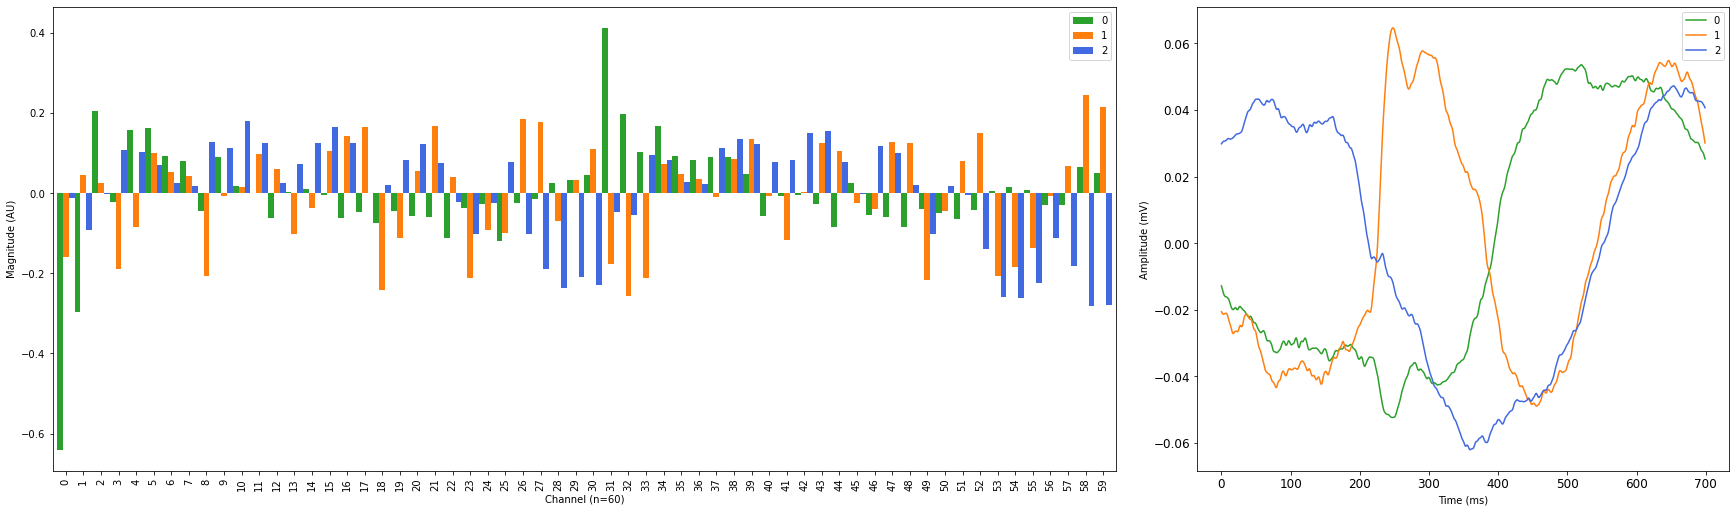

In [12]:
# Visualise the ICA outputs

pd1 = pd.DataFrame(X_ica)
pd2 = pd.DataFrame(X_temp_ica)

fig, ax = plt.subplots(1, 2, figsize=(24,7), gridspec_kw={'width_ratios': [2, 1]}, constrained_layout=True)

pd1.plot(ax=ax[0], 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='Magnitude (AU)',  
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)
ax[0].set_xticklabels(X.columns)

pd2.plot(ax=ax[1],
         kind='line',  
         xlabel='Time (ms)', 
         ylabel='Amplitude (mV)', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

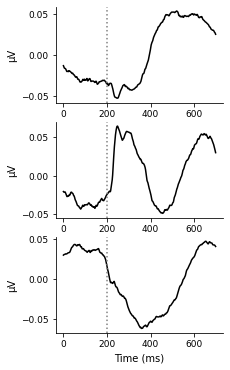

In [13]:
# Plot individual components in time

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

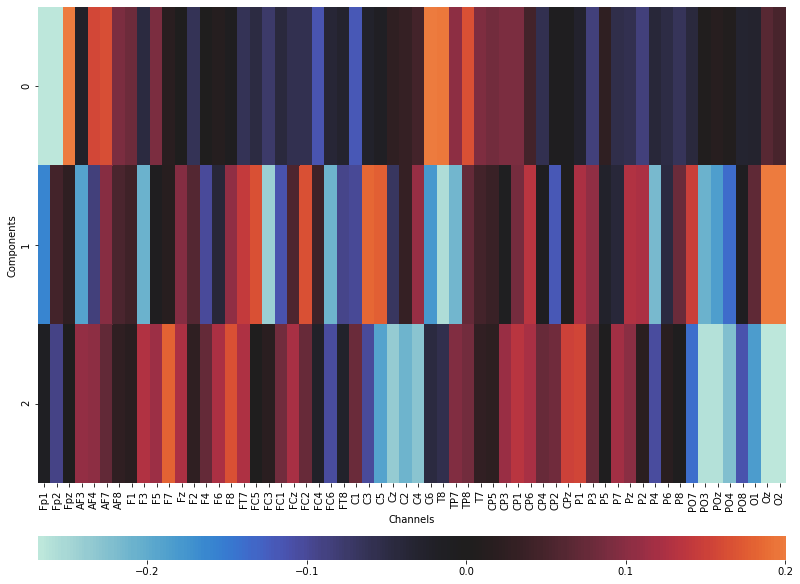

In [14]:
# Plot individual components across channels as a heatmap

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## NMF

In [15]:
# Define NMF parameters

model_NMF=NMF(n_components=3,
              solver='cd',
              beta_loss='frobenius',
              tol=0.0001,
              max_iter=800,
              random_state=None,
              alpha=0.0,
              l1_ratio=0.0,
              verbose=0,
              shuffle=False)

In [16]:
# Fit NMF

W_spat = model_NMF.fit_transform(abs(X).T)
H_spat = model_NMF.components_

X_temp = X.values.reshape(477,700,60).transpose(1,0,2).reshape(700,477*60)

W_temp = model_NMF.fit_transform(abs(X_temp))
H_temp = model_NMF.components_

print('Timepoint specific activation coefficient in the spatial domain :', H_spat)
print('Timepoint specific activation coefficient in the temporal domain:', H_temp)

/Users/anastasiakuzmich/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/anastasiakuzmich/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Timepoint specific activation coefficient in the spatial domain : [[0.1669632  0.17090086 0.15262397 ... 0.02989952 0.04775161 0.05488507]
 [0.11775194 0.11352496 0.09325065 ... 0.07818505 0.08039701 0.08143184]
 [0.00093582 0.00233811 0.01372121 ... 0.01794933 0.01984806 0.0237986 ]]
Timepoint specific activation coefficient in the temporal domain: [[1.05918576 0.69856728 0.43967621 ... 0.25472519 0.28790987 0.2599677 ]
 [0.38568446 0.18873373 0.09664365 ... 0.36795926 0.23039451 0.24827864]
 [0.39531654 0.41926007 0.28636642 ... 0.27697466 0.36014416 0.354769  ]]


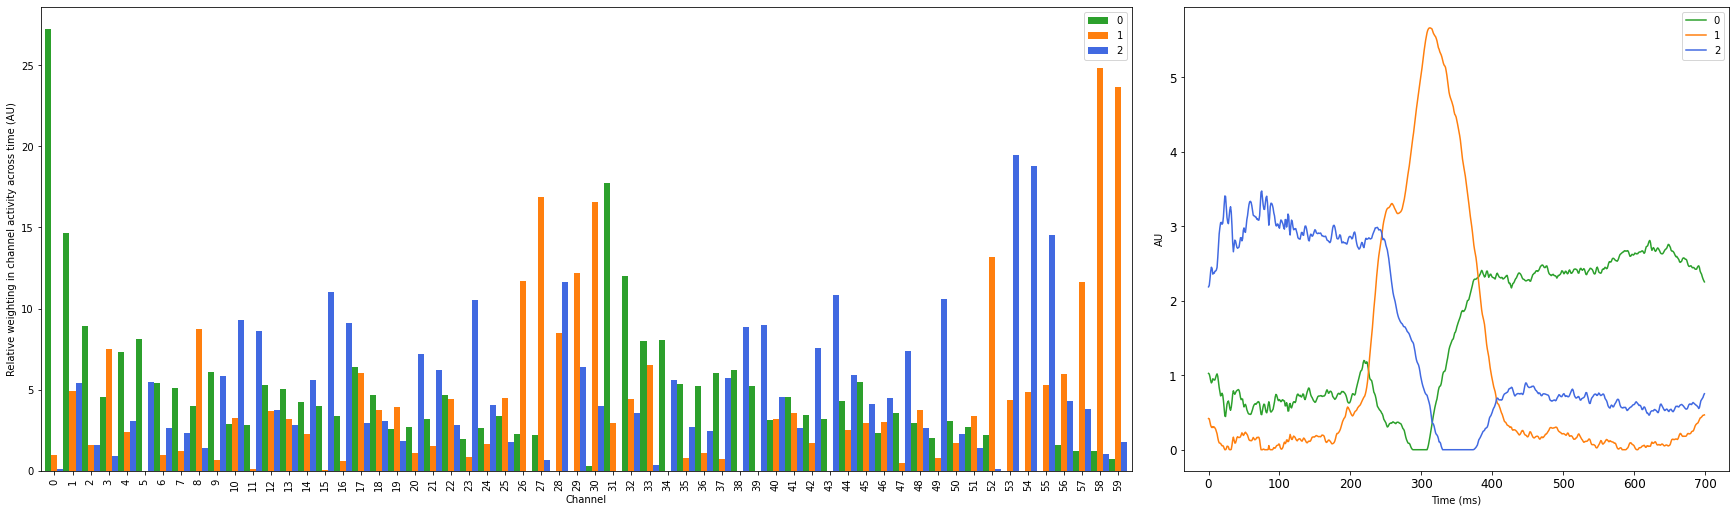

In [17]:
# Visualise the components

pd1 = pd.DataFrame(W_spat)
pd2 = pd.DataFrame(W_temp)

%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(24,7), gridspec_kw={'width_ratios': [2, 1]}, constrained_layout=True)

pd1.plot(ax=ax[0], 
         kind='bar', 
         xlabel='Channel', 
         ylabel='Relative weighting in channel activity across time (AU)', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1, 
        legend='topright')
ax[0].set_xticklabels(X.columns)

pd2.plot(ax=ax[1],
         kind='line',  
         xlabel='Time (ms)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

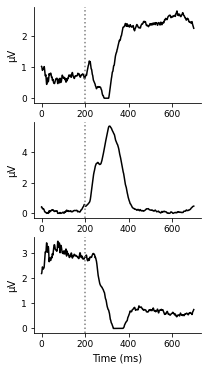

In [18]:
# Plot temporal traces individually

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

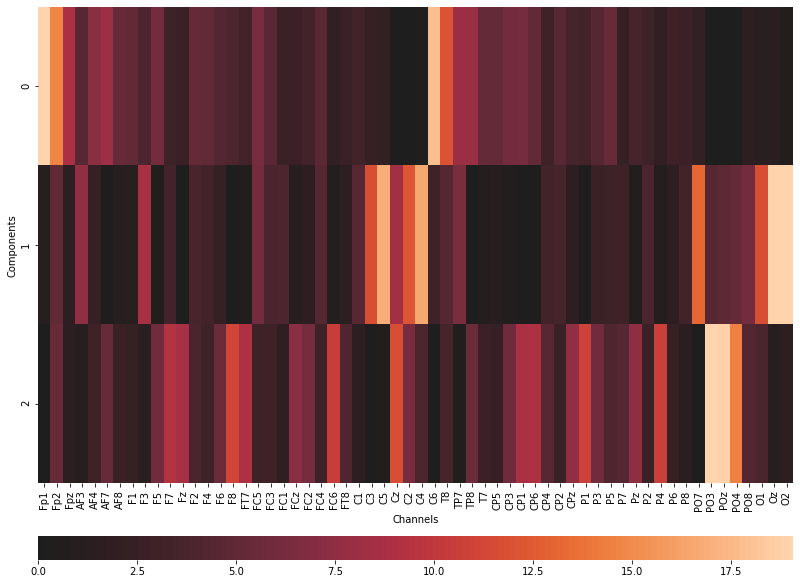

In [19]:
# Plot the components across channels 

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')